# Trabalho Final da disciplina AEDV 
**Estudantes: Juliana Carvalho e Raphael Levy**

**Novembro de 2021**

Passo 1: Escolha da base de dados.


https://www.kaggle.com/smithsonian/volcanic-eruptions

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

url = "https://raw.githubusercontent.com/JuCarv-bit/RepositoryOfDatabase/main/database.csv"
df = pd.read_csv(url, index_col=0)


In [42]:
#Dropping the rows which contain Null values
df = df.dropna()
df = df[df.Type != 'Unknown']
df = df[df["Last Known Eruption"] != 'Unknown']
df = df[df["Dominant Rock Type"] != 'No Data']



import seaborn as sns
#looks for values containing BCE    
BCE = [s for s in df["Last Known Eruption"] if "BCE" in s]
#removes BCE string
BCE = [x.strip(' BCE') for x in BCE]
#defines them as integers
BCE = list(map(int, BCE))
#add minus sign to BCE years
BCE = [ -x for x in BCE]



CE = [s for s in df["Last Known Eruption"] if " CE" in s]
CE = [x.strip(' CE') for x in CE]
CE = list(map(int, CE))

#merges the BCE and the CE integers to one list
mergedlist = BCE + CE
#print(mergedlist)
#plot the list
sns.distplot(mergedlist)
plt.xlabel("Year")

new_list = []
count_BCE = 0
count_CE = 0
for i in range(0, len(df)):

    escrito_errado = df.iloc[i]["Last Known Eruption"]
  
    if "BCE" in escrito_errado:
        new_list.append(BCE[count_BCE])
        count_BCE+=1
    elif "CE" in escrito_errado:
        new_list.append(CE[count_CE])
        count_CE+=1
    else:
        new_list.append(0.1)
df.drop('Last Known Eruption', inplace=True, axis=1)
df['Year'] = new_list

# Data Preparation - "Type" Column
df["Type"] = df["Type"].str.replace('[(,),?]', '') 
df["Type"] = df["Type"].replace(to_replace=["Calderas","Complexes","Fissure vents","Lava cones", "Maars", "Lava domes", "Pyroclastic cones","Shields", "Stratovolcanoes", "Submarinees", "Tuff cones", "Volcanic fields"], 
value=["Caldera", "Complex","Fissure vent","Lava cone", "Maar", "Lava dome","Pyroclastic cone","Shield", "Stratovolcano", "Submarine", "Tuff cone", "Volcanic field"])




In [43]:
df['Dominant Rock Type'].unique()

Rock_Num = {
    'Foidite':1,
    'Basalt / Picro-Basalt':2,
    'Trachyte / Trachydacite':3,
    'Phono-tephrite /  Tephri-phonolite':4,
    'Phonolite':5,
    'Trachyandesite / Basaltic Trachyandesite':6,
    'Rhyolite':7,
    'Trachybasalt / Tephrite Basanite':8,
    'Andesite / Basaltic Andesite':9,
    'Dacite':10
}

print(Rock_Num)

df1 = pd.DataFrame(list(Rock_Num.items()),columns = ['Dominant Rock Type','Rock Numeric'])

print (df1)
print (type(df1))
df1

#Dropping the rows which contain Null values

new_list2 = []

for i in range(0, len(df)):

    rocha = df.iloc[i]["Dominant Rock Type"]
    new_list2.append(Rock_Num[rocha])  
df['Numeric Rock'] = new_list2

df.head()

{'Foidite': 1, 'Basalt / Picro-Basalt': 2, 'Trachyte / Trachydacite': 3, 'Phono-tephrite /  Tephri-phonolite': 4, 'Phonolite': 5, 'Trachyandesite / Basaltic Trachyandesite': 6, 'Rhyolite': 7, 'Trachybasalt / Tephrite Basanite': 8, 'Andesite / Basaltic Andesite': 9, 'Dacite': 10}
                         Dominant Rock Type  Rock Numeric
0                                   Foidite             1
1                     Basalt / Picro-Basalt             2
2                   Trachyte / Trachydacite             3
3        Phono-tephrite /  Tephri-phonolite             4
4                                 Phonolite             5
5  Trachyandesite / Basaltic Trachyandesite             6
6                                  Rhyolite             7
7          Trachybasalt / Tephrite Basanite             8
8              Andesite / Basaltic Andesite             9
9                                    Dacite            10
<class 'pandas.core.frame.DataFrame'>


,Name,Country,Region,Type,Activity Evidence,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting,Year,Numeric Rock
Number,,,,,,,,,,,,
210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar,Eruption Dated,50.170,6.850,600,Foidite,Rift Zone / Continental Crust (>25 km),-8300,1
210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome,Eruption Dated,45.775,2.970,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km),-4040,2
210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone,Eruption Dated,38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km),-3600,2
211003,Vulsini,Italy,Mediterranean and Western Asia,Caldera,Eruption Observed,42.600,11.930,800,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km),-104,3
211010,Campi Flegrei,Italy,Mediterranean and Western Asia,Caldera,Eruption Observed,40.827,14.139,458,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km),1538,3


1) 10 países com mais atividade vulcânica:

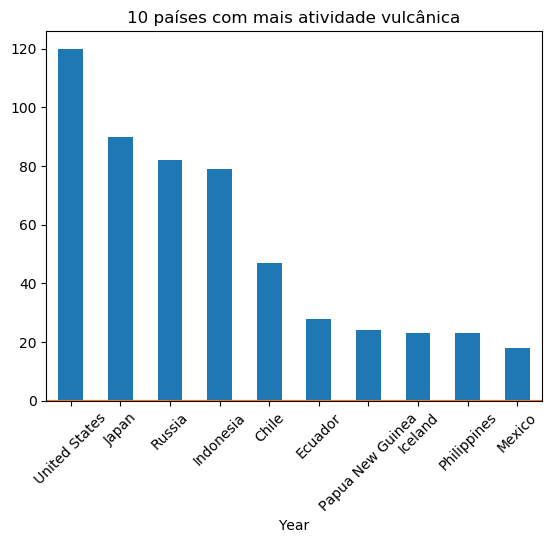

In [44]:
df["Country"].value_counts().head(10).plot(kind = "bar", rot = 45, title = "10 países com mais atividade vulcânica")
plt.show()

2) Tipo de falha tectônica:

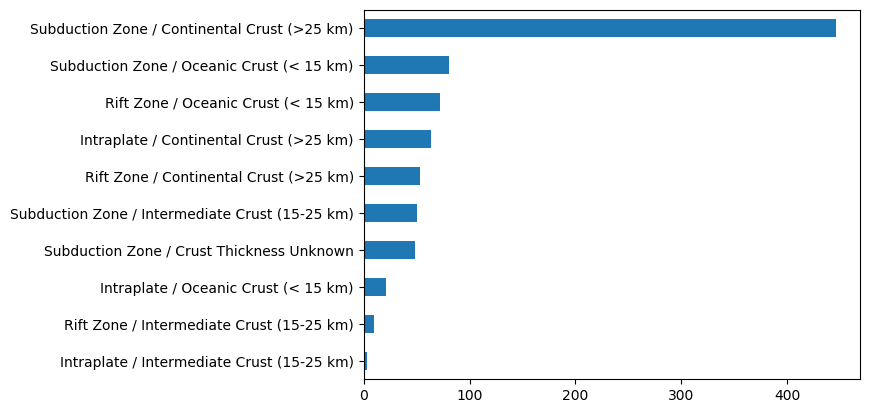

In [45]:
df["Tectonic Setting"].value_counts().sort_values().plot(kind='barh')
plt.show()

3) Distribuição da elevação de vulcões ao redor do mundo

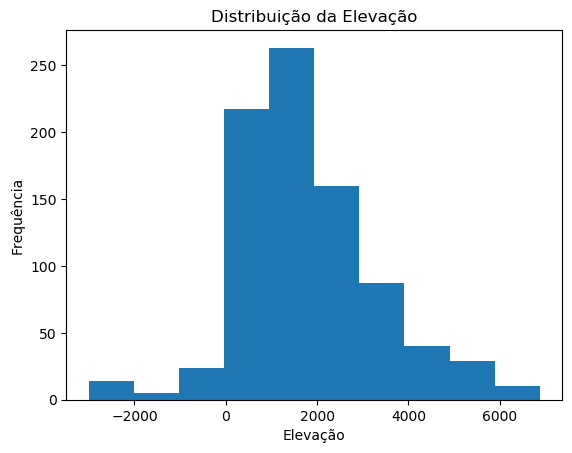

In [46]:
plt.hist(df["Elevation (Meters)"])
plt.title("Distribuição da Elevação")
plt.ylabel("Frequência")
plt.xlabel("Elevação")
plt.show()

4) 10 tipos mais comuns de vulcões:

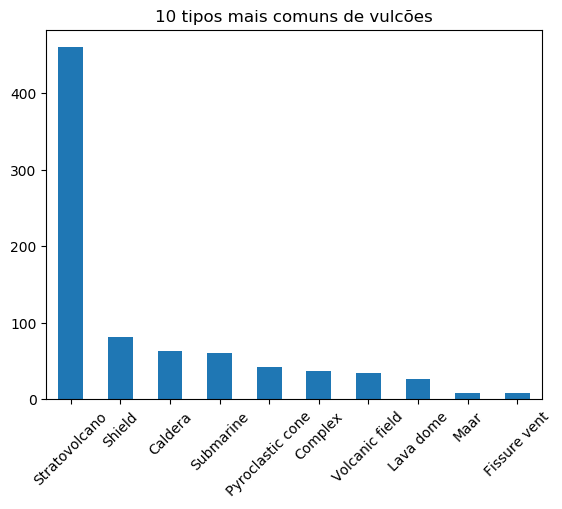

In [47]:
df["Type"].value_counts().head(10).plot(kind = "bar", rot = 45, title = "10 tipos mais comuns de vulcões")
plt.show()

In [48]:
# Creating and Displaying World map
import plotly.express as px
import geopandas as gpd
fig = px.scatter_geo(df, lat=df.Latitude, lon=df.Longitude, hover_name="Name", color="Region")
fig.show()

In [49]:
# Creating Scatter Plot
import plotly.express as px
fig = px.scatter(df, x='Region', y='Country', color='Type', title="DIFFERENT TYPES OF VOLCANOES IN DIFFERENT COUNTRIES AND REGIONS")

# Displaying Scatter Plot
fig.show()

In [50]:
df.head()

,Name,Country,Region,Type,Activity Evidence,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting,Year,Numeric Rock
Number,,,,,,,,,,,,
210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar,Eruption Dated,50.170,6.850,600,Foidite,Rift Zone / Continental Crust (>25 km),-8300,1
210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome,Eruption Dated,45.775,2.970,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km),-4040,2
210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone,Eruption Dated,38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km),-3600,2
211003,Vulsini,Italy,Mediterranean and Western Asia,Caldera,Eruption Observed,42.600,11.930,800,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km),-104,3
211010,Campi Flegrei,Italy,Mediterranean and Western Asia,Caldera,Eruption Observed,40.827,14.139,458,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km),1538,3


In [71]:
import plotly.graph_objects as go
import pandas as pd

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df['text'] = df['text'] = df['Name'] + ' ' + df['Dominant Rock Type'] + ' '+ df['Numeric Rock'].astype(str) + ', '  + df['Elevation (Meters)'].astype(str)

fig = go.Figure(data=go.Scattergeo(
        
        lon = df['Longitude'],
        lat = df['Latitude'],
        text = df['text'],
        mode = 'markers',
        
        marker = dict(
            size = df['Numeric Rock']*150,
            sizemode = "area",
            sizeref = 9,
            opacity = 0.3,
            reversescale = True,
            autocolorscale = True,
            symbol = 'circle',
            colorscale = 'Reds',
            cmin = 0,
            color = df['Elevation (Meters)'],
            cmax = df['Elevation (Meters)'].max(),
            colorbar_title="Elevação"
        )))

fig.update_layout(
        title = 'Tipos de rocha por elevação<br>(Passe o mouse sobre os marcadores para ver os dados)',
        geo = dict(
            showland = True,
            #landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.show()


In [52]:
import folium
m = folium.Map(location=[0, 0], zoom_start=1)
labels = pd.factorize(df["Region"])[0]
loc = 'Elevação de Vulcoes ao redor do mundo'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   
for i in range(0,len(df)):
    folium.CircleMarker(
      location=[df.iloc[i]['Latitude'], df.iloc[i]['Longitude']],
      radius=float(abs(df.iloc[i]["Elevation (Meters)"]))/200,
      popup = df.iloc[i]["Name"],
      color = float(labels[i]),
      fill=True,
      fill_color= "red"
   ).add_to(m)
m.get_root().html.add_child(folium.Element(title_html))
folium.LayerControl().add_to(m)
m

In [53]:
print(df["Dominant Rock Type"].value_counts())
df

Andesite / Basaltic Andesite                386
Basalt / Picro-Basalt                       264
Dacite                                       64
Trachybasalt / Tephrite Basanite             39
Rhyolite                                     36
Trachyte / Trachydacite                      28
Trachyandesite / Basaltic Trachyandesite     18
Foidite                                       6
Phonolite                                     6
Phono-tephrite /  Tephri-phonolite            2
Name: Dominant Rock Type, dtype: int64


,Name,Country,Region,Type,Activity Evidence,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting,Year,Numeric Rock,text
Number,,,,,,,,,,,,,
210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar,Eruption Dated,50.170,6.850,600,Foidite,Rift Zone / Continental Crust (>25 km),-8300,1,"West Eifel Volcanic Field Foidite 1, 600"
210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome,Eruption Dated,45.775,2.970,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km),-4040,2,"Chaine des Puys Basalt / Picro-Basalt 2, 1464"
210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone,Eruption Dated,38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km),-3600,2,Calatrava Volcanic Field Basalt / Picro-Basalt...
211003,Vulsini,Italy,Mediterranean and Western Asia,Caldera,Eruption Observed,42.600,11.930,800,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km),-104,3,"Vulsini Trachyte / Trachydacite 3, 800"
211010,Campi Flegrei,Italy,Mediterranean and Western Asia,Caldera,Eruption Observed,40.827,14.139,458,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km),1538,3,"Campi Flegrei Trachyte / Trachydacite 3, 458"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390081,Montagu Island,United Kingdom,Antarctica,Shield,Eruption Observed,-58.445,-26.374,1370,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km),2007,2,"Montagu Island Basalt / Picro-Basalt 2, 1370"
390090,Saunders,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,-57.800,-26.483,843,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km),2015,2,"Saunders Basalt / Picro-Basalt 2, 843"
390100,Candlemas Island,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,-57.080,-26.670,550,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km),1911,2,"Candlemas Island Basalt / Picro-Basalt 2, 550"


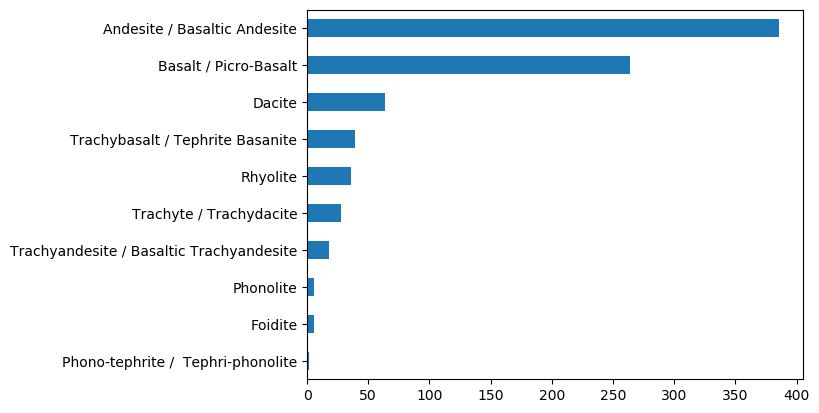

In [54]:
df["Dominant Rock Type"].value_counts().sort_values().plot(kind='barh')
plt.show()

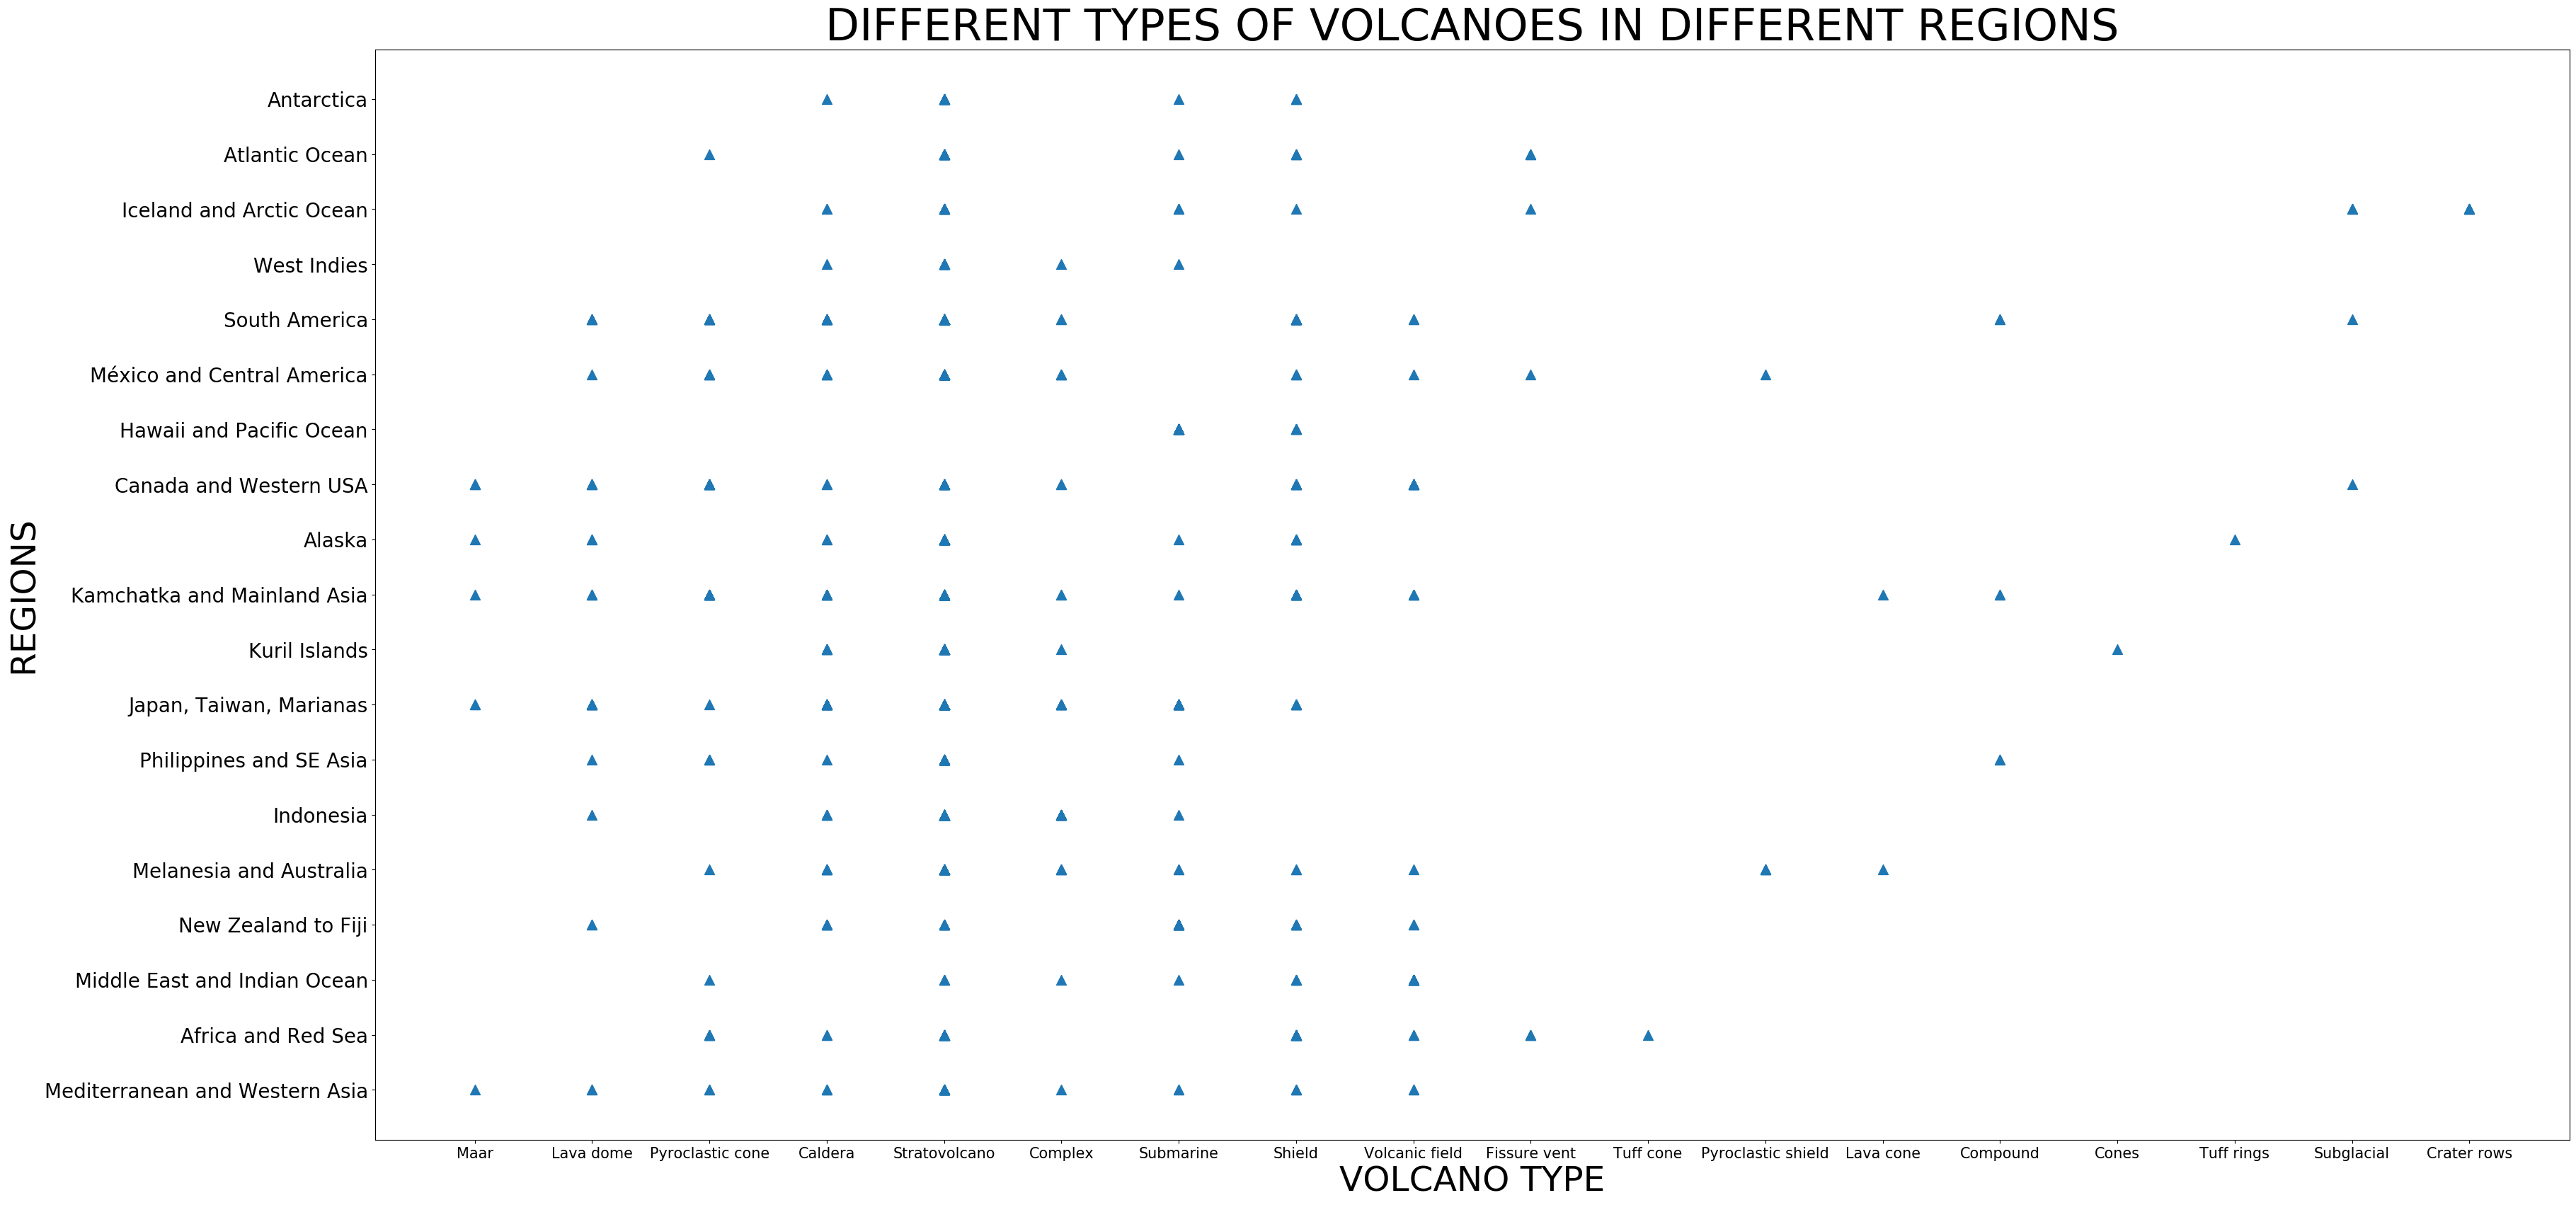

In [55]:
# Creating Scatter Plot
fig = plt.figure(figsize =(40, 20)) 
plt.scatter(df["Type"], df["Region"], marker="^", s=100) 
plt.xlabel("VOLCANO TYPE", fontsize=35) 
plt.xticks(fontsize=15)
plt.ylabel("REGIONS", fontsize=35) 
plt.yticks(fontsize=20)
plt.title("DIFFERENT TYPES OF VOLCANOES IN DIFFERENT REGIONS", fontsize=45)

# Displaying Scatter Plot
plt.show() 

In [56]:
# Dropping the Number Column
df.columns

Index(['Name', 'Country', 'Region', 'Type', 'Activity Evidence', 'Latitude',
       'Longitude', 'Elevation (Meters)', 'Dominant Rock Type',
       'Tectonic Setting', 'Year', 'Numeric Rock', 'text'],
      dtype='object')

In [57]:
"""
from wordcloud import WordCloud

text= ' '
for s, row in volcanoes.iterrows():
    text = " ".join([text,"_".join(row['Country'].strip().split(" "))])
text = text.strip()

plt.figure(figsize=(12,6))
wordcloud = WordCloud(width=600, height=300, max_font_size=60, max_words=20, collocations=False).generate(text)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("20 Countries with most recently erupted volcanoes", fontsize=30)
plt.axis("off")
plt.show()
"""

'\nfrom wordcloud import WordCloud\n\ntext= \' \'\nfor s, row in volcanoes.iterrows():\n    text = " ".join([text,"_".join(row[\'Country\'].strip().split(" "))])\ntext = text.strip()\n\nplt.figure(figsize=(12,6))\nwordcloud = WordCloud(width=600, height=300, max_font_size=60, max_words=20, collocations=False).generate(text)\nwordcloud.recolor(random_state=0)\nplt.imshow(wordcloud)\nplt.title("20 Countries with most recently erupted volcanoes", fontsize=30)\nplt.axis("off")\nplt.show()\n'

In [58]:
df.columns
df.head()

,Name,Country,Region,Type,Activity Evidence,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting,Year,Numeric Rock,text
Number,,,,,,,,,,,,,
210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar,Eruption Dated,50.170,6.850,600,Foidite,Rift Zone / Continental Crust (>25 km),-8300,1,"West Eifel Volcanic Field Foidite 1, 600"
210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome,Eruption Dated,45.775,2.970,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km),-4040,2,"Chaine des Puys Basalt / Picro-Basalt 2, 1464"
210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone,Eruption Dated,38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km),-3600,2,Calatrava Volcanic Field Basalt / Picro-Basalt...
211003,Vulsini,Italy,Mediterranean and Western Asia,Caldera,Eruption Observed,42.600,11.930,800,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km),-104,3,"Vulsini Trachyte / Trachydacite 3, 800"
211010,Campi Flegrei,Italy,Mediterranean and Western Asia,Caldera,Eruption Observed,40.827,14.139,458,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km),1538,3,"Campi Flegrei Trachyte / Trachydacite 3, 458"


In [59]:
"""
#adding animation to bubble plot
px.scatter(df,x='Dominant Rock Type',y='Type',color='Region', color_discrete_sequence=["red", "blue", "yellow", "green", "#C8FF33"], size='Elevation (Meters)',size_max=70,
          hover_name='Country', animation_frame='Last Known Eruption',
          animation_group='Country', range_x=[0,8], range_y=[30,90], labels={"lifeExp": "Life expectancy at birth, total ...", "childs_per_woman":"Fertility rate, total (birth by woman)"})

"""

'\n#adding animation to bubble plot\npx.scatter(df,x=\'Dominant Rock Type\',y=\'Type\',color=\'Region\', color_discrete_sequence=["red", "blue", "yellow", "green", "#C8FF33"], size=\'Elevation (Meters)\',size_max=70,\n          hover_name=\'Country\', animation_frame=\'Last Known Eruption\',\n          animation_group=\'Country\', range_x=[0,8], range_y=[30,90], labels={"lifeExp": "Life expectancy at birth, total ...", "childs_per_woman":"Fertility rate, total (birth by woman)"})\n\n'